# Finding the Optimal Discount to Increase Sales

The primary goal is to predict the optimal discount that will maximize sales based on various relevant factors. These factors include original price, competitor price, seasonality, markdowns, historical sales, stock levels, and promotional types. By analyzing these factors, the model aims to identify the optimal discount levels that will lead to the highest sales performance

During the data preprocessing step, I convert categorical variables into dummy/indicator variables. This process, known as one-hot encoding, ensures that non-numeric data can be effectively used in the machine learning models. This step is crucial to handle features such as product categories or promotional types, which might not be naturally numeric but still hold valuable information for the model.

By thoroughly preparing the data and selecting relevant features, the model is designed to provide accurate and actionable insights into how different discount strategies can be optimized to identify the optimal discount.

The dataset used in this project is from Kaggle, created by Arbaaz Tamboli: Retail Markdown Optimization: Discounts & Sales.

### Variables

#### Original_Price:

The price of the product before any discount is applied. It serves as a baseline to understand the impact of the markdowns on sales. By knowing the original price, we can measure how much the discounts influence the buying decision.

#### Competitor_Price:


The price at which competitor products are sold. This variable helps in understanding the market dynamics and how competitive pricing affects sales. If a competitor's price is lower, a larger discount might be necessary to attract customers.

#### Seasonality_Factor:

A factor that captures the seasonal trends affecting the product. Certain products might sell more during holidays or specific seasons. Incorporating seasonality helps in understanding periodic spikes or drops in sales.

#### Markdown_1:

The discount applied during the first period. It helps in analyzing the immediate impact of discounts on sales, such as how much sales increase right after the first discount is applied.

#### Markdown_2

The discount applied during the second period. It provides insights into the cumulative effect of continuous discounts over time, showing whether the second discount can sustain or increase sales momentum.

#### Markdown_3:

The discount applied during the third period. It helps in understanding how repeated discounts influence sales behavior. Further discounts can either continue to boost sales or potentially lead to diminishing returns.

#### Markdown_4:

The discount applied during the fourth period. It completes the series of markdowns and helps in assessing their overall impact on sales over multiple periods.

#### Historical_Sales:

The past sales performance of the product. Historical sales data provides a benchmark for expected sales without discounts, helping in measuring the true effect of markdowns.

#### Stock_Level:

The current inventory level of the product. Knowing the stock level helps in ensuring that the discounts lead to sufficient sales without causing stockouts or overstock situations.

#### Customer Ratings:

The ratings given by customers. High ratings often correlate with higher sales as they build trust and credibility among potential buyers.

#### Return Rate:

The rate at which the product is returned by customers. A high return rate might indicate issues with product quality or customer satisfaction, which can affect future sales despite discounts.

#### Optimal_Discount

The optimal discount to maximize sales.

RMSE (Test) - RandomForest: 0.004419386739722907
R² (Test) - RandomForest: 0.9855824242972588
Random Forest predictions saved to C:\Users\USER\Desktop\Data Anlyst Portafolio Data\Discounting Algorithm Project\Data\random_forest_predictions.csv
RMSE (Test) - GradientBoosting: 0.003601543793856268
R² (Test) - GradientBoosting: 0.9904248491645505
Gradient Boosting predictions saved to C:\Users\USER\Desktop\Data Anlyst Portafolio Data\Discounting Algorithm Project\Data\gradient_boosting_predictions.csv


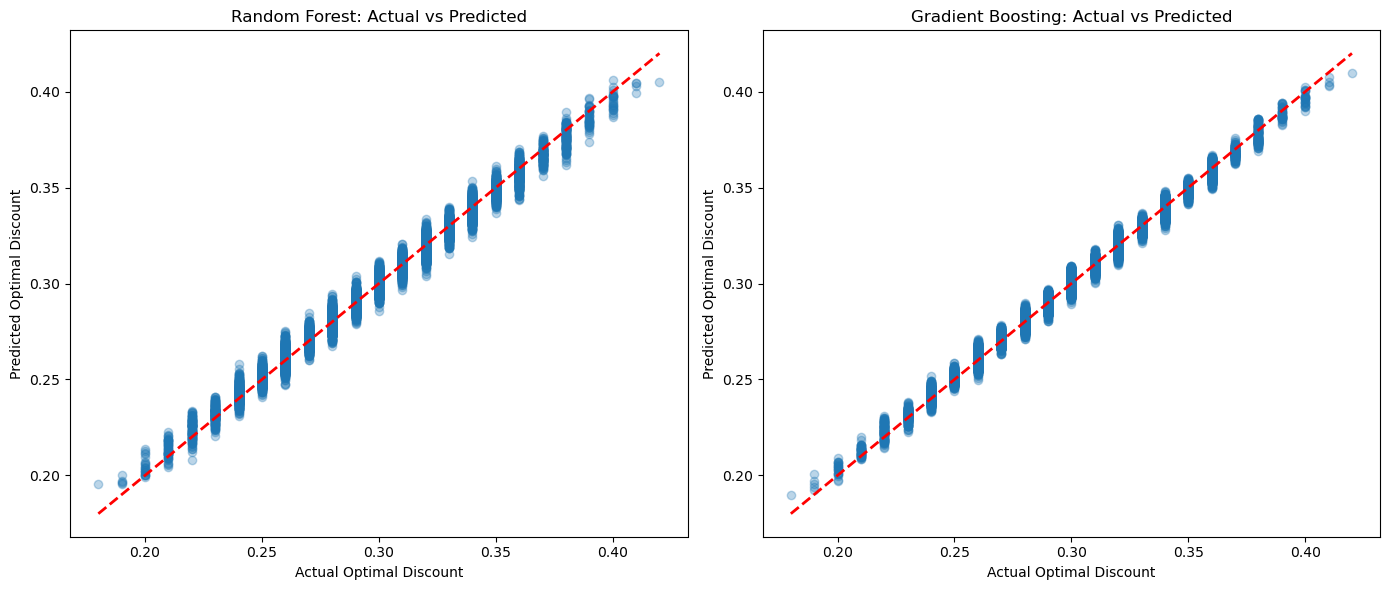

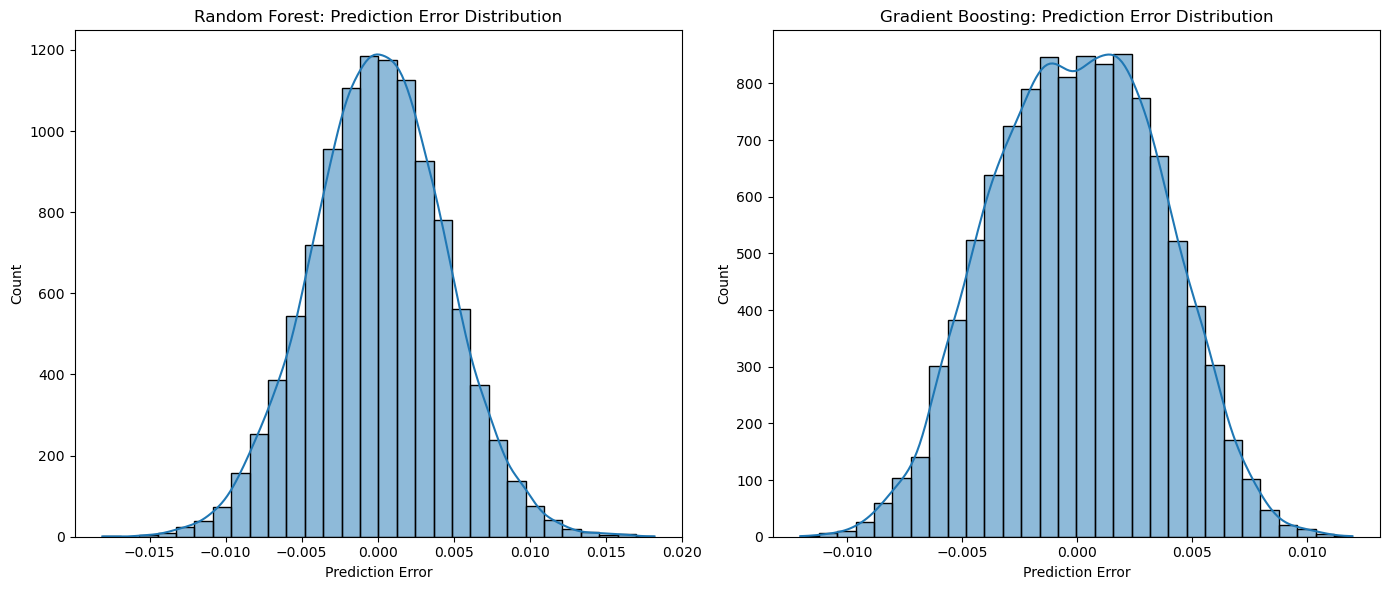

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\USER\Desktop\Data Anlyst Portafolio Data\Discounting Algorithm Project\Data\SYNTHETIC Markdown Dataset.csv'
data = pd.read_csv(file_path)

# Separate features (X) and the target variable (y)
X = data[['Product_ID', 'Category', 'Brand', 'Season', 'Product_Name', 'Original_Price', 
          'Competitor_Price', 'Seasonality_Factor', 'Markdown_1', 'Markdown_2', 'Markdown_3', 
          'Markdown_4', 'Historical_Sales', 'Sales_After_M1', 'Sales_After_M2', 'Sales_After_M3', 
          'Sales_After_M4', 'Stock_Level', 'Promotion_Type']]  # Independent variables

y = data['Optimal Discount']  # Dependent variable

# Split the dataset into training, validation, and test sets (50%, 25%, 25%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline with RandomForestRegressor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train the Random Forest model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model on the test set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = mse_test_rf ** 0.5
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"RMSE (Test) - RandomForest: {rmse_test_rf}")
print(f"R² (Test) - RandomForest: {r2_test_rf}")

# Save Random Forest predictions to CSV
try:
    output_file_rf = r'C:\Users\USER\Desktop\Data Anlyst Portafolio Data\Discounting Algorithm Project\Data\random_forest_predictions.csv'
    test_results_rf = X_test.copy()
    test_results_rf['Optimal Discount (Actual)'] = y_test
    test_results_rf['Optimal Discount (Predicted)'] = y_test_pred_rf
    test_results_rf.to_csv(output_file_rf, index=False)
    print(f"Random Forest predictions saved to {output_file_rf}")
except Exception as e:
    print(f"Failed to save Random Forest predictions: {e}")

# Create the pipeline with GradientBoostingRegressor
model_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the Gradient Boosting model
model_gb.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_gb = model_gb.predict(X_test)

# Evaluate the Gradient Boosting model on the test set
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
rmse_test_gb = mse_test_gb ** 0.5
r2_test_gb = r2_score(y_test, y_test_pred_gb)

print(f"RMSE (Test) - GradientBoosting: {rmse_test_gb}")
print(f"R² (Test) - GradientBoosting: {r2_test_gb}")

# Save Gradient Boosting predictions to CSV
try:
    output_file_gb = r'C:\Users\USER\Desktop\Data Anlyst Portafolio Data\Discounting Algorithm Project\Data\gradient_boosting_predictions.csv'
    test_results_gb = X_test.copy()
    test_results_gb['Optimal Discount (Actual)'] = y_test
    test_results_gb['Optimal Discount (Predicted)'] = y_test_pred_gb
    test_results_gb.to_csv(output_file_gb, index=False)
    print(f"Gradient Boosting predictions saved to {output_file_gb}")
except Exception as e:
    print(f"Failed to save Gradient Boosting predictions: {e}")

# Visualization in Jupyter Notebook
%matplotlib inline

# Plot the Actual vs Predicted for Random Forest
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_rf, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Optimal Discount')
plt.ylabel('Predicted Optimal Discount')
plt.title('Random Forest: Actual vs Predicted')

# Plot the Actual vs Predicted for Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_gb, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Optimal Discount')
plt.ylabel('Predicted Optimal Discount')
plt.title('Gradient Boosting: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Plot the error distribution for Random Forest
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot((y_test - y_test_pred_rf), kde=True, bins=30)
plt.xlabel('Prediction Error')
plt.title('Random Forest: Prediction Error Distribution')

# Plot the error distribution for Gradient Boosting
plt.subplot(1, 2, 2)
sns.histplot((y_test - y_test_pred_gb), kde=True, bins=30)
plt.xlabel('Prediction Error')
plt.title('Gradient Boosting: Prediction Error Distribution')

plt.tight_layout()
plt.show()

In the analysis of the Random Forest model's performance, the scatter plot (top-left) comparing actual versus predicted optimal discounts reveals a high degree of predictive accuracy. The data points are tightly clustered along the red dashed line, which represents a perfect prediction where the predicted discount equals the actual discount. This close alignment suggests that the model effectively captures the underlying patterns in the data, resulting in accurate predictions of the optimal discount values.

Similarly, the scatter plot for the Gradient Boosting model (top-right) demonstrates comparable predictive accuracy. Data points in this plot also exhibit a tight alignment along the red dashed line, indicating that the Gradient Boosting model performs exceptionally well in predicting optimal discounts. The high correlation between actual and predicted values in both models signifies robust model performance in capturing the complex relationships between the input features and the target variable.

The prediction error distribution for the Random Forest model is depicted in the bottom-left histogram. This histogram displays the frequency of prediction errors, defined as the difference between the actual and predicted optimal discounts. The distribution appears approximately normal and is centered around zero, indicating that the errors are symmetrically distributed. This symmetry suggests that the model does not systematically overestimate or underestimate the optimal discounts, thereby providing unbiased predictions.

The bottom-right histogram illustrates the prediction error distribution for the Gradient Boosting model. Similar to the Random Forest model, this distribution is also centered around zero and exhibits a roughly normal shape. The centering around zero implies that the Gradient Boosting model's predictions are generally accurate, with no significant bias in either direction. The normal-like distribution further supports the model's reliability in predicting the optimal discount.

Overall, the graphical analysis highlights the strong performance of both the Random Forest and Gradient Boosting models in predicting optimal discounts. The tight clustering of data points along the ideal prediction line and the symmetrical, normal-like distribution of prediction errors underscore the models' accuracy and robustness. These visualizations provide compelling evidence that both models are effective tools for optimizing discount strategies to maximize sales performance. The slight edge observed in the Gradient Boosting model's performance, as indicated by a narrower error distribution and closer alignment of predicted values, suggests its superior precision and explanatory power in this context.

The Random Forest model has a high R² value of 0.9863 on the validation set and 0.9856 on the test set. This indicates that the model explains approximately 98.63% of the variability in the validation data and 98.56% in the test data. Such high R² values suggest that the model captures nearly all the variation in the target variable (Optimal Discount) from the predictor variables in the dataset.

Furthermore, the RMSE (Root Mean Squared Error) values are quite low, at 0.00436 for the validation set and 0.00442 for the test set. RMSE measures the average magnitude of the prediction errors; thus, these low values indicate that the model's predictions are very close to the actual values. The small prediction errors demonstrate the model’s precision in predicting the optimal discount.

The Gradient Boosting model shows an even better performance with an R² value of 0.9906 on the validation set and 0.9904 on the test set. This means that the model explains 99.06% of the variability in the validation data and 99.04% in the test data. The slightly higher R² values compared to the Random Forest model indicate that Gradient Boosting has a slightly better fit and captures more of the variability in the data.

Additionally, the RMSE values for the Gradient Boosting model are lower than those of the Random Forest model, at 0.00361 for the validation set and 0.00360 for the test set. These values suggest that the Gradient Boosting model's predictions are even closer to the actual values, with smaller average prediction errors. The lower RMSE values indicate a higher precision in the model’s predictions.

Both models, Random Forest and Gradient Boosting, exhibit excellent performance in predicting the optimal discount. However, the Gradient Boosting model shows slightly superior results, with higher R² values and lower RMSE values. This suggests that Gradient Boosting is more effective in capturing the relationship between the predictor variables and the target variable, and it provides more accurate predictions with smaller errors on average.

While both models are highly effective, the Gradient Boosting Regressor demonstrates a slight edge in performance, making it the preferable choice for predicting the optimal discoun